# Supervised Learning and Machine Learning Algorithms

## Overview

In this notebook, you'll learn about **Supervised Learning** - where we train machine learning models on labeled data (where we know the correct answers) to make predictions on new, unseen data.

**Our Goal:** Predict whether a heart failure patient will have a death event based on clinical measurements.

**Key Concepts You'll Learn:**
- How to properly split data into training and testing sets
- Multiple classification algorithms and when to use each
- How to evaluate model performance with appropriate metrics
- How to compare different models to find the best one

**The Dataset:** 299 heart failure patients with 11 clinical features (age, ejection fraction, creatinine levels, etc.) and a target variable (DEATH_EVENT: 0 = survived, 1 = deceased)

In [21]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('./heart_failure_clinical_records_dataset.csv') #make sure to replace with your data directory
df.drop(columns=['time'],inplace=True) #drop the time column which is not one of the informative features 
df_features = df.iloc[:,:-1]
df_target = df['DEATH_EVENT']

X = df_features
y = df_target

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [23]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [25]:
y.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Create train and test sets

We should divide the dataset to train and test splits. We train our ML algorithms on train dataset and evaluate their performance on test set


## Why Split Data?

A critical principle in machine learning is **avoiding data leakage**. If we train AND test on the same data, a model can simply memorize the training data instead of learning generalizable patterns. This leads to overly optimistic performance metrics.

**Solution:** Split data into:
- **Training set (70%):** Used to train the model
- **Test set (30%):** Used to evaluate performance on unseen data

**Stratification:** We use `stratify=y` to maintain the same class distribution (proportion of death events) in both train and test sets. This is important for imbalanced datasets.

In [26]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=21)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print('y train: ',y_train.value_counts(normalize=True))
print('y test: ',y_test.value_counts(normalize=True))

(209, 11)
(209,)
(90, 11)
(90,)
y train:  DEATH_EVENT
0    0.679426
1    0.320574
Name: proportion, dtype: float64
y test:  DEATH_EVENT
0    0.677778
1    0.322222
Name: proportion, dtype: float64


In [29]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
28,58.0,1,60,0,38,0,153000.0,5.8,134,1,0
198,50.0,1,582,1,20,1,279000.0,1.0,134,0,0
120,60.0,1,737,0,60,1,210000.0,1.5,135,1,1
219,55.0,0,582,1,35,1,371000.0,0.7,140,0,0
105,72.0,1,328,0,30,1,621000.0,1.7,138,0,1
...,...,...,...,...,...,...,...,...,...,...,...
158,85.0,1,910,0,50,0,235000.0,1.3,134,1,0
160,66.0,1,72,0,40,1,242000.0,1.2,134,1,0
84,59.0,1,280,1,25,1,302000.0,1.0,141,0,0
268,45.0,0,582,1,38,0,302000.0,0.9,140,0,0


A model with random guess which always predict the majority group has 68% accuracy. 

# Normalize train and test sets separately


## Why Normalize Data?

Our features have different scales:
- **Age:** 40-80 years
- **Ejection Fraction:** 15-80 %
- **Platelets:** 25,000-850,000 cells/μL

Algorithms like SVM and KNN are **distance-based** - they calculate distances between data points. Large-scale features (like platelets) would dominate the distance calculation, making small-scale features (like ejection fraction) irrelevant.

**Z-score Normalization:** Transforms each feature to have mean=0 and standard deviation=1. This puts all features on the same scale.

**Important:** We normalize training and test sets separately to avoid data leakage (we shouldn't use test data statistics to transform the training data).

In [30]:
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = zscore(X_train)
X_test = zscore(X_test)

# Logistic regression Model 

1- Establish your model 

2- Fit your model 

3- Predict on test set

4- Evaluation on test set

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.7111111111111111
Precision: 0.5789473684210527
Recall: 0.3793103448275862
F1-Score: 0.4583333333333333


# Random Forest

## Exercise: Train a Random Forest model on train set and report Accuracy, Precision, Recall, F1-Score on test split

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [33]:
y_test.head(50)

28     1
198    0
120    0
219    0
105    1
62     0
178    0
75     1
211    0
276    0
264    0
11     1
19     1
257    0
170    0
286    0
90     0
294    0
199    0
224    0
89     0
51     1
209    0
16     1
138    0
110    1
163    1
78     0
250    0
247    0
18     1
167    1
123    0
225    0
24     1
142    0
145    0
148    1
291    0
190    0
66     1
201    0
210    0
187    1
29     1
144    1
10     1
152    0
131    0
135    0
Name: DEATH_EVENT, dtype: int64

In [34]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.7222222222222222
Precision: 0.5909090909090909
Recall: 0.4482758620689655
F1-Score: 0.5098039215686274


In [35]:
preds = model.predict(X_train)

In [36]:
print("Accuracy:", accuracy_score(y_train, preds))

Accuracy: 1.0


In [37]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

# Support Vector Machines

In [38]:
SVC?

Object `SVC` not found.


In [39]:
#Linear SVM
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.7
Precision: 0.5454545454545454
Recall: 0.41379310344827586
F1-Score: 0.47058823529411764


# Excercise: Run SVM with RBF kernel and report metrics

In [40]:
#Write your code here
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.7333333333333333
Precision: 0.6190476190476191
Recall: 0.4482758620689655
F1-Score: 0.52


# K-Nearest Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.6666666666666666
Precision: 0.47058823529411764
Recall: 0.27586206896551724
F1-Score: 0.34782608695652173


# Dummy classifier

# Baseline Model: Dummy Classifier

## What is a Baseline Model?

A **baseline model** is a simple, often trivial model used as a reference point to evaluate the performance of more complex machine learning models.

**Why is it important?**
- Provides a **minimum performance threshold** - any real model should beat the baseline
- Helps detect **overfitting** - if your fancy model barely beats the baseline, something is wrong
- Establishes **expectations** - shows what luck alone can achieve
- Useful for **imbalanced datasets** - reveals class distribution bias
- **Sanity check** - if you can't beat the baseline, reconsider your approach

**Our Baseline Question:** If we just always guess "survived" (the majority class), what accuracy would we get?
- **Answer:** 67.8% (proportion of class 0 in test set)

This means any real ML model must get > 67.8% accuracy to be useful!


## Dummy Classifier Strategies

DummyClassifier provides different simple strategies:

| Strategy | What it does | Use case |
|----------|-------------|----------|
| **most_frequent** | Always predict the most common class | Baseline for imbalanced data |
| **stratified** | Predicts randomly but matches class distribution | Compare to random guessing |
| **uniform** | Completely random predictions | See what true random guessing gives |
| **constant** | Always predicts the same class you specify | Custom baseline |

**For our heart failure dataset:**
- **most_frequent strategy:** Always predicts "survived" (class 0) → ~67.8% accuracy
- **stratified strategy:** Randomly guesses with 67.8% "survived" and 32.2% "death" → accuracy varies
- **uniform strategy:** 50/50 random guess → ~50% accuracy (worse than most_frequent!)

In [42]:
from sklearn.dummy import DummyClassifier

DummyClassifier?

Init signature: DummyClassifier(*, strategy='prior', random_state=None, constant=None)
Docstring:     
DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more
complex classifiers.

The specific behavior of the baseline is selected with the `strategy`
parameter.

All strategies make predictions that ignore the input feature values passed
as the `X` argument to `fit` and `predict`. The predictions, however,
typically depend on values observed in the `y` parameter passed to `fit`.

Note that the "stratified" and "uniform" strategies lead to
non-deterministic predictions that can be rendered deterministic by setting
the `random_state` parameter if needed. The other strategies are naturally
deterministic and, once fit, always return the same constant prediction
for any value of `X`.

Read more in the :ref:`User Guide <dummy_estimators>`.

.. versionadded:: 0.13

Parameters
----------
strategy : {"most_frequ

In [43]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

preds = dummy_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.6777777777777778
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/home/am/P/W26-MDST-Project_Heart-Failure-Survival-Analysis/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Excercise: Design another classifier not mentioned above

In [44]:
# Write your code here
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1-Score:", f1_score(y_test, preds))

Accuracy: 0.7
Precision: 0.5714285714285714
Recall: 0.27586206896551724
F1-Score: 0.37209302325581395


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

# Train all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True),
    'SVM (Linear)': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Dummy (Baseline)': DummyClassifier(strategy='most_frequent')
}

# Store results
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, zero_division=0),
        'Recall': recall_score(y_test, preds, zero_division=0),
        'F1-Score': f1_score(y_test, preds, zero_division=0)
    }

# Create results dataframe
results_df = pd.DataFrame(results).T
print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(results_df.round(4))
print("="*70)


MODEL PERFORMANCE COMPARISON
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.7111     0.5789  0.3793    0.4583
Random Forest          0.7111     0.5600  0.4828    0.5185
SVM (RBF)              0.7333     0.6190  0.4483    0.5200
SVM (Linear)           0.7000     0.5455  0.4138    0.4706
KNN                    0.6667     0.4706  0.2759    0.3478
Naive Bayes            0.7000     0.5714  0.2759    0.3721
Dummy (Baseline)       0.6778     0.0000  0.0000    0.0000


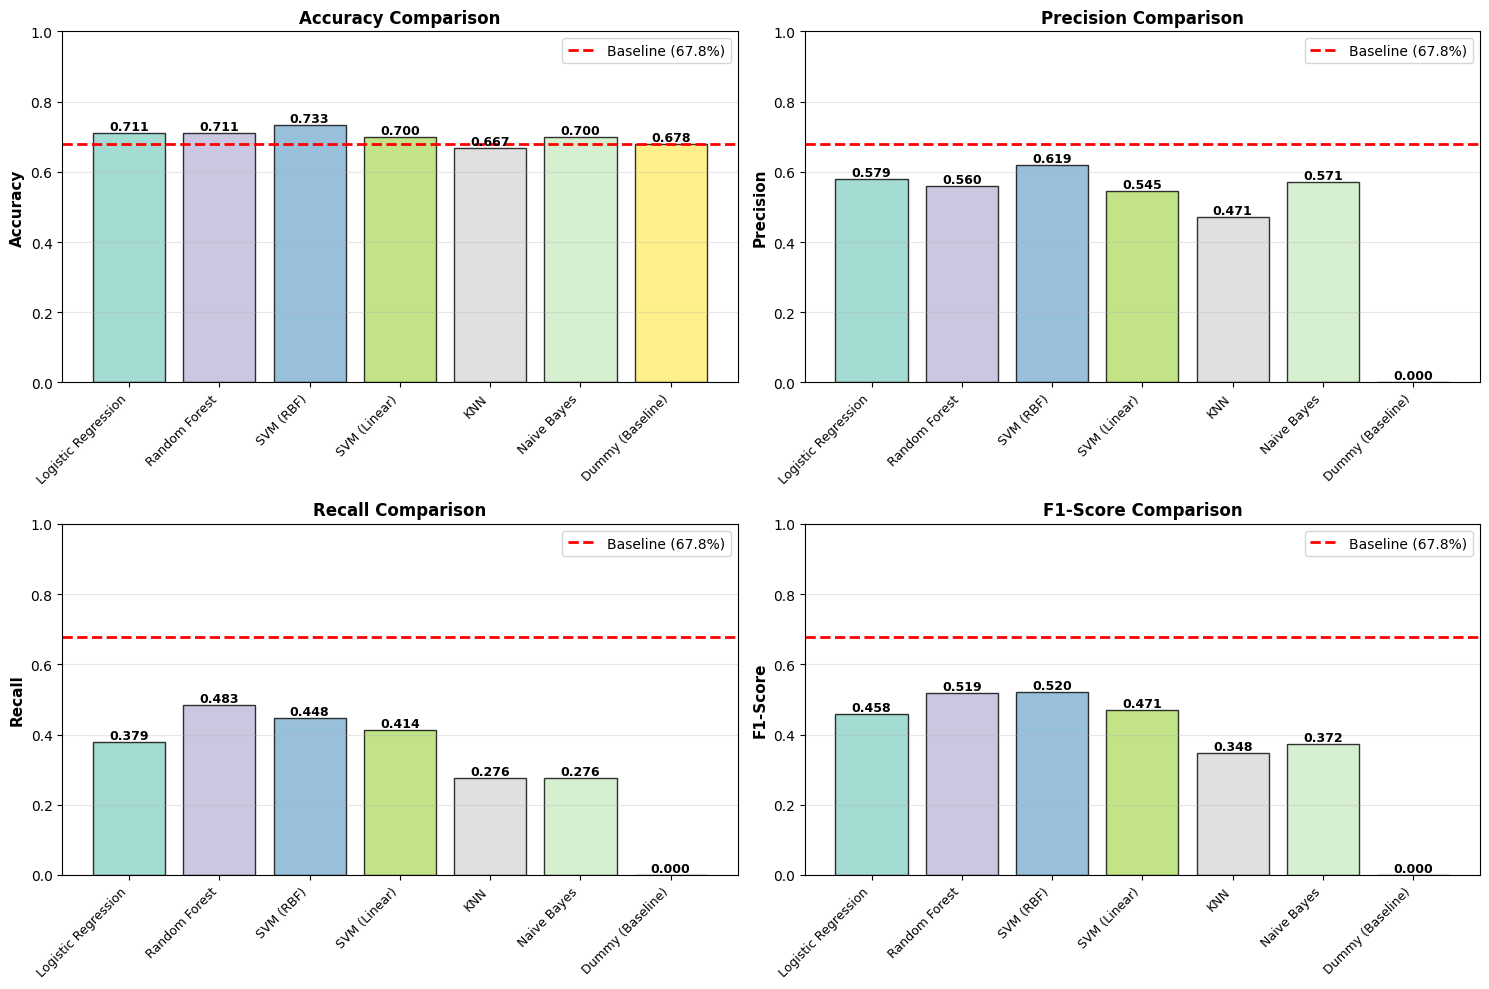


Key Insights:
Best Accuracy: SVM (RBF) (0.7333)
Best Precision: SVM (RBF) (0.6190)
Best Recall: Random Forest (0.4828)
Best F1-Score: SVM (RBF) (0.5200)


In [46]:
# Visualization 1: Metrics Comparison Bar Chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = results_df[metric].values
    x_pos = np.arange(len(models))
    
    bars = ax.bar(x_pos, values, color=colors, alpha=0.8, edgecolor='black')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.axhline(y=0.678, color='red', linestyle='--', linewidth=2, label='Baseline (67.8%)')
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models.keys(), rotation=45, ha='right', fontsize=9)
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"Best Accuracy: {results_df['Accuracy'].idxmax()} ({results_df['Accuracy'].max():.4f})")
print(f"Best Precision: {results_df['Precision'].idxmax()} ({results_df['Precision'].max():.4f})")
print(f"Best Recall: {results_df['Recall'].idxmax()} ({results_df['Recall'].max():.4f})")
print(f"Best F1-Score: {results_df['F1-Score'].idxmax()} ({results_df['F1-Score'].max():.4f})")

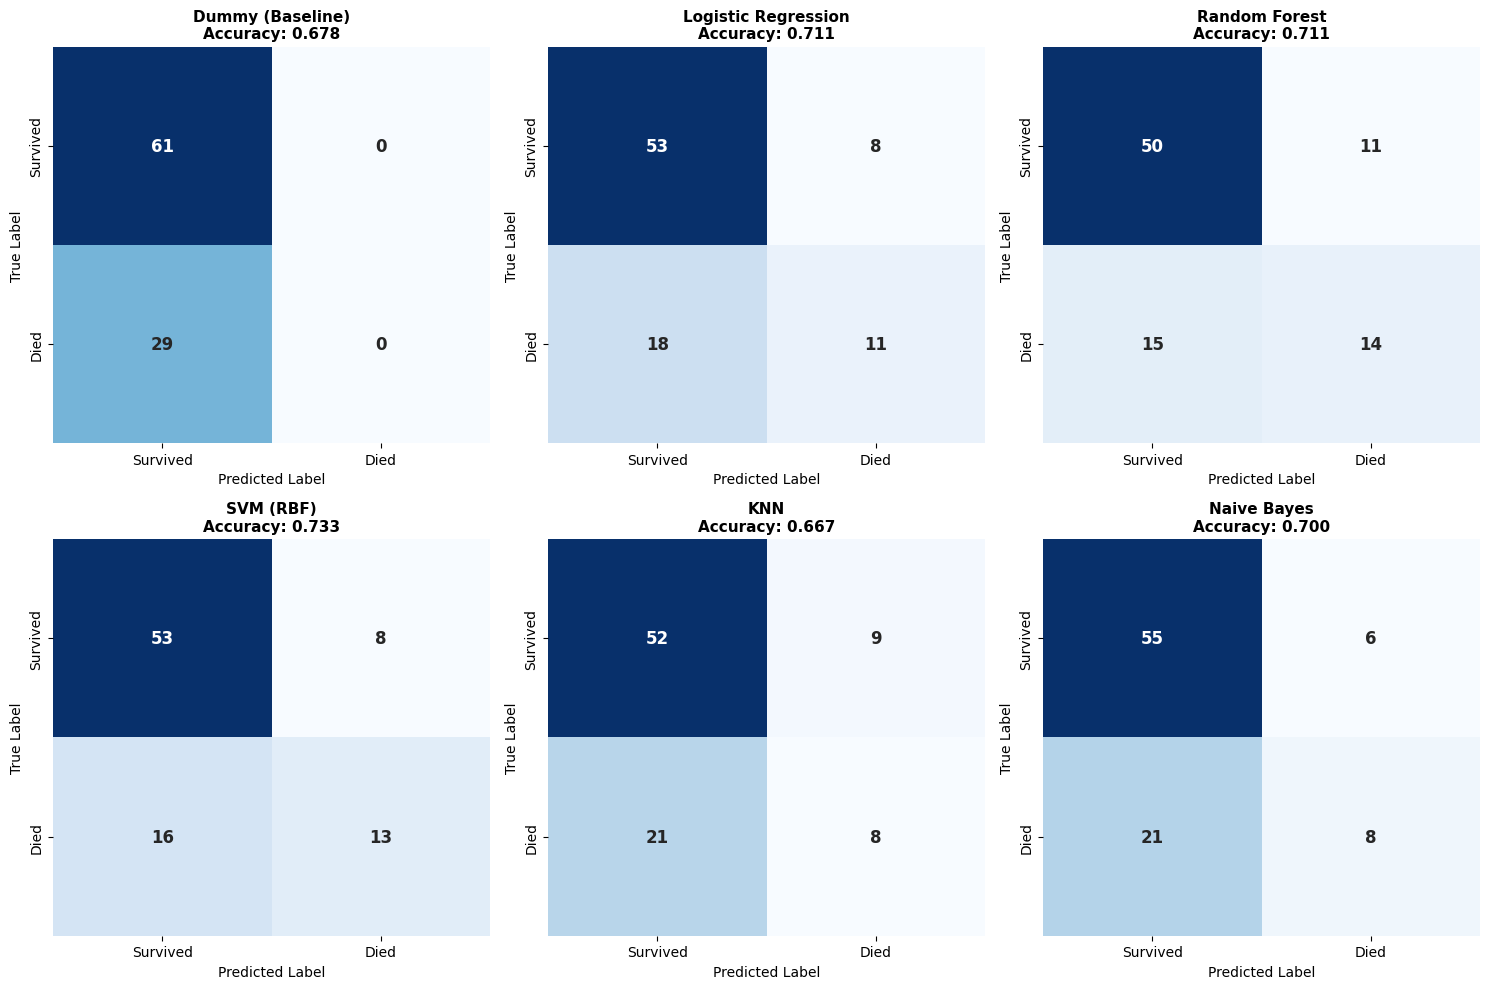


CONFUSION MATRIX INTERPRETATION

Dummy (Baseline):
  True Negatives (Survived correctly): 61
  False Positives (Survived but predicted Died): 0
  False Negatives (Died but predicted Survived): 29
  True Positives (Died correctly): 0

Logistic Regression:
  True Negatives (Survived correctly): 53
  False Positives (Survived but predicted Died): 8
  False Negatives (Died but predicted Survived): 18
  True Positives (Died correctly): 11

Random Forest:
  True Negatives (Survived correctly): 50
  False Positives (Survived but predicted Died): 11
  False Negatives (Died but predicted Survived): 15
  True Positives (Died correctly): 14

SVM (RBF):
  True Negatives (Survived correctly): 53
  False Positives (Survived but predicted Died): 8
  False Negatives (Died but predicted Survived): 16
  True Positives (Died correctly): 13

KNN:
  True Negatives (Survived correctly): 52
  False Positives (Survived but predicted Died): 9
  False Negatives (Died but predicted Survived): 21
  True Positive

In [47]:
# Visualization 2: Confusion Matrices for Key Models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

key_models = ['Dummy (Baseline)', 'Logistic Regression', 'Random Forest', 
              'SVM (RBF)', 'KNN', 'Naive Bayes']

for idx, model_name in enumerate(key_models):
    cm = confusion_matrix(y_test, predictions[model_name])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    
    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]["Accuracy"]:.3f}',
                        fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_xticklabels(['Survived', 'Died'])
    axes[idx].set_yticklabels(['Survived', 'Died'])

plt.tight_layout()
plt.show()

# Analyze confusion matrices
print("\n" + "="*70)
print("CONFUSION MATRIX INTERPRETATION")
print("="*70)
for model_name in key_models:
    cm = confusion_matrix(y_test, predictions[model_name])
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{model_name}:")
    print(f"  True Negatives (Survived correctly): {tn}")
    print(f"  False Positives (Survived but predicted Died): {fp}")
    print(f"  False Negatives (Died but predicted Survived): {fn}")
    print(f"  True Positives (Died correctly): {tp}")

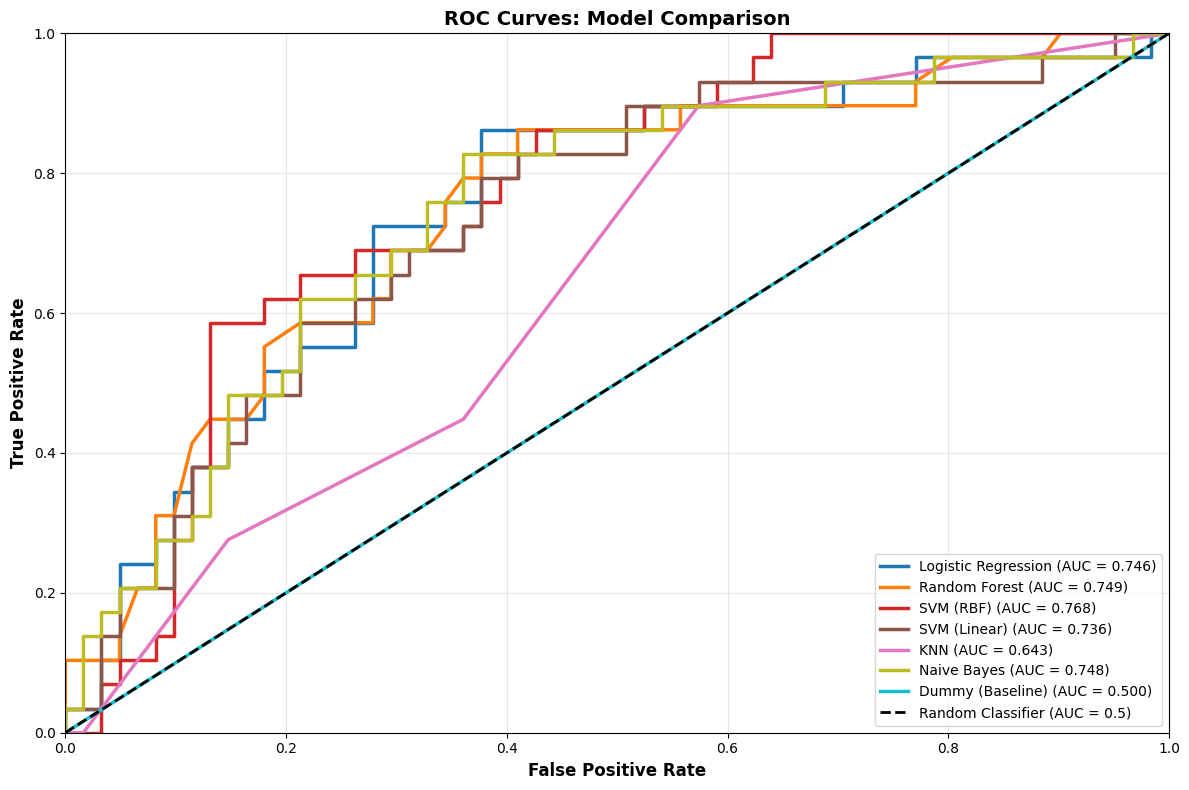


ROC-AUC SCORES
Logistic Regression       AUC-ROC: 0.7462
Random Forest             AUC-ROC: 0.7490
SVM (RBF)                 AUC-ROC: 0.7682
SVM (Linear)              AUC-ROC: 0.7343
KNN                       AUC-ROC: 0.6427
Naive Bayes               AUC-ROC: 0.7479
Dummy (Baseline)          AUC-ROC: 0.5000


In [48]:
# Visualization 3: ROC Curves for Model Comparison
fig, ax = plt.subplots(figsize=(12, 8))

colors_roc = plt.cm.tab10(np.linspace(0, 1, len(models)))

for (name, model), color in zip(models.items(), colors_roc):
    model.fit(X_train, y_train)
    
    # Get probability predictions
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})',
            linewidth=2.5, color=color)

# Plot random classifier baseline
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves: Model Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ROC-AUC SCORES")
print("="*70)
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"{name:25} AUC-ROC: {roc_auc:.4f}")

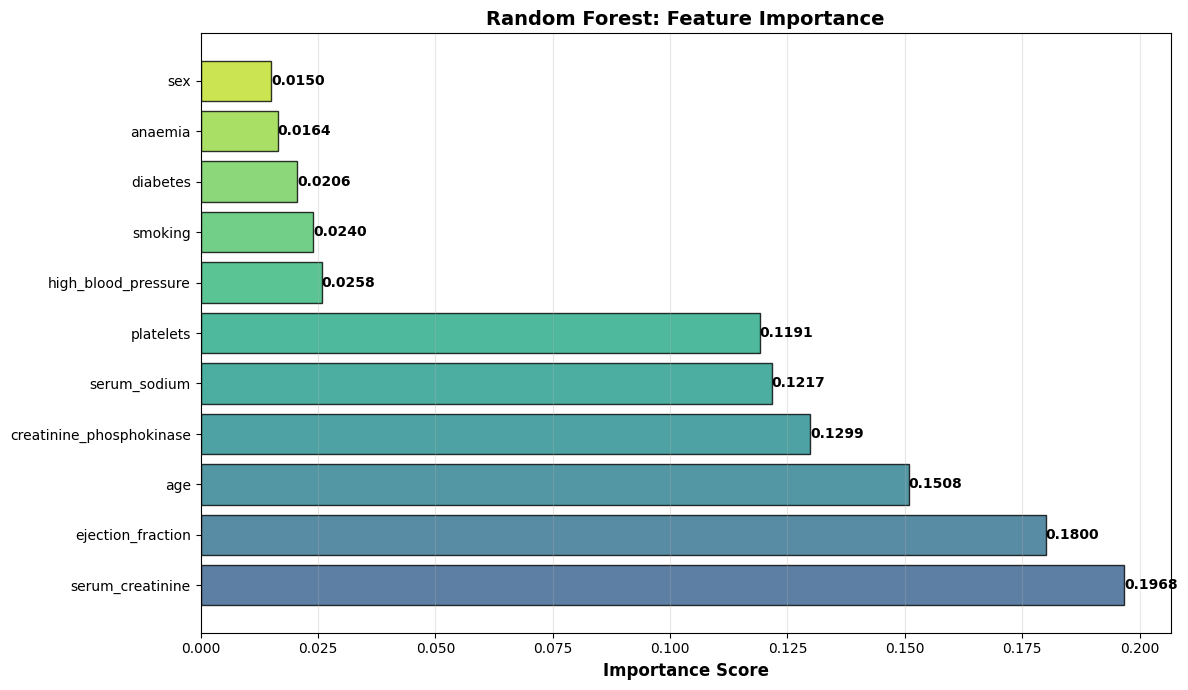


FEATURE IMPORTANCE RANKING
serum_creatinine               0.196768
ejection_fraction              0.179973
age                            0.150780
creatinine_phosphokinase       0.129883
serum_sodium                   0.121666
platelets                      0.119112
high_blood_pressure            0.025787
smoking                        0.024011
diabetes                       0.020561
anaemia                        0.016412
sex                            0.015049


In [49]:
# Visualization 4: Feature Importance from Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))

colors_importance = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], 
               color=colors_importance, edgecolor='black', alpha=0.8)

# Add value labels
for idx, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Random Forest: Feature Importance', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FEATURE IMPORTANCE RANKING")
print("="*70)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:30} {row['Importance']:.6f}")

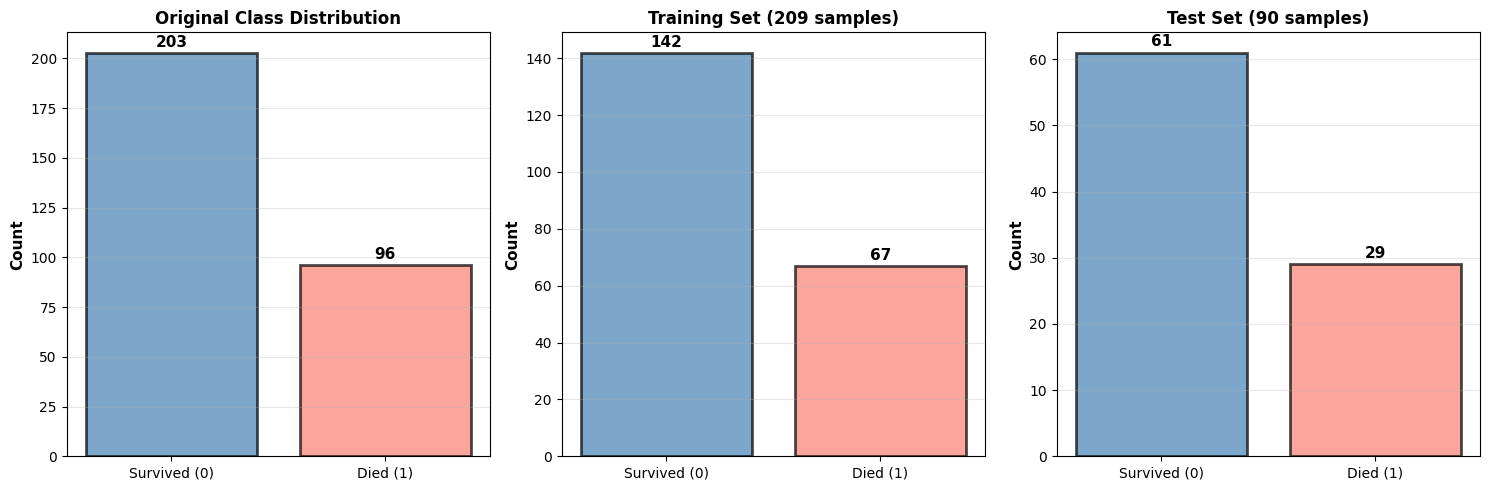


DATASET STATISTICS
Total samples: 299
Training samples: 209 (69.9%)
Test samples: 90 (30.1%)

Class distribution (Survived:Died)
Overall: 203:96 (67.9%:32.1%)
Training: 142:67 (67.9%:32.1%)
Test: 61:29 (67.8%:32.2%)


In [50]:
# Visualization 5: Class Distribution & Data Split
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original class distribution
original_dist = y.value_counts()
axes[0].bar(['Survived (0)', 'Died (1)'], original_dist.values, 
            color=['steelblue', 'salmon'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[0].set_title('Original Class Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(original_dist.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=11)

# Train set class distribution
train_dist = y_train.value_counts()
axes[1].bar(['Survived (0)', 'Died (1)'], train_dist.values,
            color=['steelblue', 'salmon'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1].set_title(f'Training Set ({len(y_train)} samples)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(train_dist.values):
    axes[1].text(i, v + 2, str(v), ha='center', fontweight='bold', fontsize=11)

# Test set class distribution
test_dist = y_test.value_counts()
axes[2].bar(['Survived (0)', 'Died (1)'], test_dist.values,
            color=['steelblue', 'salmon'], alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[2].set_title(f'Test Set ({len(y_test)} samples)', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(test_dist.values):
    axes[2].text(i, v + 1, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DATASET STATISTICS")
print("="*70)
print(f"Total samples: {len(y)}")
print(f"Training samples: {len(y_train)} ({len(y_train)/len(y)*100:.1f}%)")
print(f"Test samples: {len(y_test)} ({len(y_test)/len(y)*100:.1f}%)")
print(f"\nClass distribution (Survived:Died)")
print(f"Overall: {original_dist[0]}:{original_dist[1]} ({original_dist[0]/len(y)*100:.1f}%:{original_dist[1]/len(y)*100:.1f}%)")
print(f"Training: {train_dist[0]}:{train_dist[1]} ({train_dist[0]/len(y_train)*100:.1f}%:{train_dist[1]/len(y_train)*100:.1f}%)")
print(f"Test: {test_dist[0]}:{test_dist[1]} ({test_dist[0]/len(y_test)*100:.1f}%:{test_dist[1]/len(y_test)*100:.1f}%)")

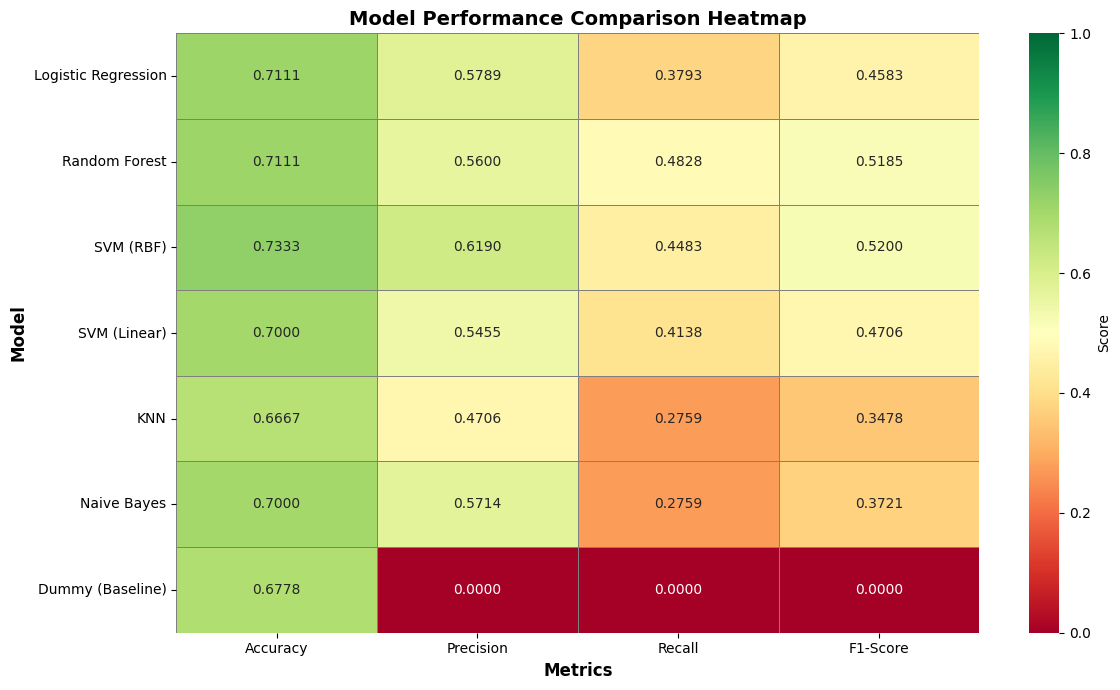


MODEL SELECTION GUIDE

CHOOSE YOUR MODEL BASED ON YOUR PRIORITY:

1. **Best Overall (Balanced Performance)**
   → Look for high F1-Score (balances precision & recall)

2. **Minimize False Negatives (Critical)**
   → Maximize Recall (catches all true positives)
   → Example: Medical diagnosis (missing a disease is costly)

3. **Minimize False Positives (Important)**
   → Maximize Precision (minimize false alarms)
   → Example: Spam detection (false positives annoy users)

4. **Quick & Simple**
   → Logistic Regression (interpretable, fast)

5. **Maximum Accuracy**
   → Random Forest or SVM (if accuracy is your metric)

INTERPRETATION GUIDE:
- Accuracy: % of correct predictions (can be misleading for imbalanced data)
- Precision: Of predicted deaths, how many were correct?
- Recall: Of actual deaths, how many did we catch?
- F1-Score: Harmonic mean of precision & recall
- AUC-ROC: Area under the ROC curve (best for imbalanced data)


BENCHMARK TO BEAT: 67.8% (Baseline - always predict '

In [51]:
# Visualization 6: Model Performance Heatmap
fig, ax = plt.subplots(figsize=(12, 7))

# Create heatmap
sns.heatmap(results_df, annot=True, fmt='.4f', cmap='RdYlGn', center=0.5,
            cbar_kws={'label': 'Score'}, linewidths=0.5, linecolor='gray',
            ax=ax, vmin=0, vmax=1)

ax.set_title('Model Performance Comparison Heatmap', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODEL SELECTION GUIDE")
print("="*70)
print("""
CHOOSE YOUR MODEL BASED ON YOUR PRIORITY:

1. **Best Overall (Balanced Performance)**
   → Look for high F1-Score (balances precision & recall)

2. **Minimize False Negatives (Critical)**
   → Maximize Recall (catches all true positives)
   → Example: Medical diagnosis (missing a disease is costly)

3. **Minimize False Positives (Important)**
   → Maximize Precision (minimize false alarms)
   → Example: Spam detection (false positives annoy users)

4. **Quick & Simple**
   → Logistic Regression (interpretable, fast)

5. **Maximum Accuracy**
   → Random Forest or SVM (if accuracy is your metric)

INTERPRETATION GUIDE:
- Accuracy: % of correct predictions (can be misleading for imbalanced data)
- Precision: Of predicted deaths, how many were correct?
- Recall: Of actual deaths, how many did we catch?
- F1-Score: Harmonic mean of precision & recall
- AUC-ROC: Area under the ROC curve (best for imbalanced data)
""")

print("\nBENCHMARK TO BEAT: 67.8% (Baseline - always predict 'Survived')")
print("Models exceeding baseline by >5%: Good performance")
print("Models exceeding baseline by >10%: Excellent performance")